<h1 style="text-align:center"><em>Interactive</em> Plotting of the Free Vibration of a<br> Mass-Spring-Damper System</h1>
<h3 style="text-align:center"> MCHE 485: Mechanical Vibrations</h3>
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
http://www.ucs.louisiana.edu/~jev9637/   </p>

<p style="text-align:center">
	<img src="http://shared.crawlab.org/MassSpringDamper_FreeVibration.png" alt="A Mass-Spring-Damper System" width=50%/></a><br>
    <strong> Figure 1: A Mass-Spring-Damper System </strong>
</p>

This notebook simluates the free vibration of a simple mass-spring-damper system like the one shown in Figure 1. More specifically, we'll look at how the system response to non-zero initial conditions. The interactive widget allows us to explore how the response changes as the natural frequency and damping ratio changes.

The equation of motion for the system is:

$ \quad m \ddot{x} + c \dot{x} + kx = 0 $

We could also write this equation in terms of the damping ratio, $\zeta$, and natural frequency $\omega_n$.

$ \quad \ddot{x} + 2\zeta\omega_n\dot{x} + \omega_n^2x = 0$

For information on how to obtain this equation, you can see the lectures at the [class website](http://www.ucs.louisiana.edu/~jev9637/MCHE485.html).

We'll use the solution to the differential equation that we developed in class to plot the response. The solution for the underdamped case is:

$ \quad x(t) = e^{-\zeta\omega_nt}\left(a_1 e^{i \omega_d t} + a_2 e ^{-i \omega_d t}\right) $ 

*or*

$ \quad x(t) = e^{-\zeta\omega_nt}\left(b_1 \cos{\omega_d t} + b_2 \sin{\omega_d t}\right) $

To use this equation, we need to solve for $a_1$ and $a_2$ or $b_1$ and $b_2$ using the initial conditions. Here, let's use the sin/cosine form. Solving the equation for generic intial velocity, $\dot{x} = v_0$, and a generic initial displacement, $x = x_0$, we find:

$ \quad x(t) = e^{-\zeta\omega_nt}\left(x_0 \cos{\omega_d t} + \frac{\zeta \omega_n x_0 + v_0}{\omega_d} \sin{\omega_d t}\right) $

In [1]:
import numpy as np              # Grab all of the NumPy functions with "nickname" np

In [2]:
# We want our plots to be displayed inline, not in a separate window
%matplotlib inline 

# Import the plotting functions
import matplotlib.pyplot as plt

In [3]:
# Set up simulation parameters
t = np.linspace(0, 5, 501)            # Time for simulation, 0-5s with 500 points in-between

# Define the initial conditions x(0) = 1 and x_dot(0) = 0 
x0 = [1.0, 0.0]

# Interactive Simluation
Let's use the Jupyter Notebook's relatively-new interactive widgets. We'll set up sliders for natural frequecny (in Hz) and damping ratio. The response will update as you move the sliders. There may be some flickering during the first time you change the sliders. 

The interactive portion will not run in the online notebook viewer, so you'll have to run it locally to play with the interactive part. The .gif in Figure 2 shows what the resulting interactive plot should look like after you run the next cell locally.
<p style="text-align:center">
	<img src="http://shared.crawlab.org/IPython_Interactive_MassSpringDamper.gif" alt="An Interactive Mass-Spring-Damper System" width=75%/></a>
    <strong> Figure 2: The Interactive Mass-Spring-Damper Response </strong>
</p>
<br>

<function __main__.plot_response>

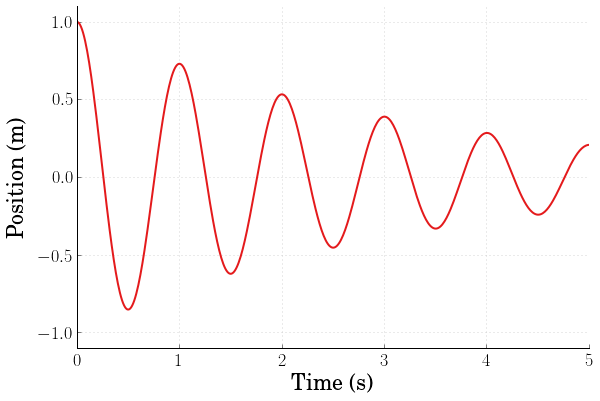

In [4]:
# import the IPython widgets
from IPython.html.widgets import interact
from IPython.html import widgets    # Widget definitions
from IPython.display import display # Used to display widgets in the notebook

# Set up the function that plots the repsonse based on slider changes
def plot_response(f = 1.0, z = 0.05):
    # Make the figure pretty, then plot the results
    #   "pretty" parameters selected based on pdf output, not screen output
    #   Many of these setting could also be made default by the .matplotlibrc file
    fig = plt.figure(figsize=(9, 6))
    ax = plt.gca()
    plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)
    plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
    plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.grid(True, linestyle=':', color='0.75')
    ax.set_axisbelow(True)
    
    wn = 2 * np.pi * f
    wd = wn * np.sqrt(1 - z**2)
    
    # Define x(t)
    x = np.exp(-z * wn * t) * (x0[0] * np.cos(wd*t) + (z * wn * x0[0] + x0[1])/wd * np.sin(wd*t))
    
    plt.plot(t, x, linewidth=2)
    plt.xlabel('Time (s)',family='serif', fontsize=22, weight='bold', labelpad=5)
    plt.ylabel('Position (m)',family='serif', fontsize=22, weight='bold', labelpad=10)
    plt.ylim(-1.1, 1.1)
    plt.xlim(0, 5)
    

# Call the slider interaction
#  f is changes in frequency, allowing between 0.2 and 1.8Hz at 0.1Hz increments
#  z is damping ratio, allowing between 0 and 0.9 and 0.05 increments
interact(plot_response, f=(0.2, 1.8, 0.01), z = (0, 0.9, 0.01))

<hr class = "style-end">
#### Licenses
Code is licensed under a 3-clause BSD-style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.

In [5]:
# Ignore this cell - We just update the CSS to make the notebook look a little bit better

# Improve the notebook styling -- Run this first
from IPython.core.display import HTML
css_file = 'styling/CRAWLAB_IPythonNotebook.css'
HTML(open(css_file, "r").read())